# Task 1: Permutations and Combinations

This task analyses the Lady Tasting Tea experiment using Python to calculate the probability of a person correctly guessing which cups had milk first under different scenarios, assuming no special powers. It explores probabilities for perfect guesses, at most one error, and evaluates the acceptance of two errors, with justifications provided in code and Markdown.

#### Task description
Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

Would you accept two errors? Explain.

In [1]:
# Import dependencies ------
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math
# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools
# Random selections.
# https://docs.python.org/3/library/random.html
import random
# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np
# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

In [2]:
# set variables ----------

# Number of cups of tea in total.
no_cups = 12 #k
# Number of cups of tea with milk in first.
no_cups_milk_first = 6 #n
# Number of cups of tea with tea in first.
no_cups_tea_first = 6 #n-k

The total number of possible combinations is calculated with combination formula (binomial coefficient )or the number of ways to choose 𝑘 items from a set of 𝑛 items, where order does not matter:
>$\binom{n}{k} = \frac{n!}{k!(n-k)!}$

- 𝑛! is the factorial of 𝑛, the total number of items.
- 𝑘! is the factorial of 𝑘, the number of items you're choosing.
- (𝑛−𝑘)! is the factorial of the remaining items.


In [3]:
# evaluation the choose formula (ref: lecture notes)
n,k = no_cups, no_cups_milk_first #assigning variables
choose = math.factorial(n)/(math.factorial(k)*(math.factorial(n-k)))
choose


924.0

In [4]:
# math.comb function does the same thing. (ref: lecture notes)
ways = math.comb(no_cups, no_cups_milk_first)
# Show.
ways

924

In [5]:
# we can show all possible combinations the 6 cups can be chosen
    # with list(itertools.combinations()function) 
# (ref: lecture notes)

# Create The cup labels.
labels = list(range(n)) #create a list containing integers from 0 to 7 to represent the cups
print("teacup labels: ", labels)
# Show the different ways (combinations) of selecting no_cups_milk_first out of no_cups cups of tea.
combinations = list(itertools.combinations(labels, k))
# Show.
combs=combinations
print("count combinations: ",len(combs))
#combs

teacup labels:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
count combinations:  924


Now we have 3 different ways of proving that there are 924 possible combinations of chosing 6 items out of 12.
$$\binom{n}{k} = \frac{n!}{k!(n-k)!} $$
$$\binom{12}{6} = \frac{12!}{6!(12-6)!} = 924$$


##### *Probability*
In this case, choosing the 6 correct cups from 12 is a mutually exclusive scenario where the lady either gets it all right or not. There are 924 different ways to choose 6 cups from 12 and only 1 way to get it right when all 6 selected cups are milk-in-first cups. Therefore, she has a 1 in 924 (or 0.11%) chance of succeeding. 
$$ P= \frac {1}{\binom {n}{k}} = \frac {1}{\binom {12}{6}} = \frac {1}{924} $$

###### ref: combination formula: https://en.wikipedia.org/wiki/Combination<br>ref: binomial coefficient: https://en.wikipedia.org/wiki/Binomial_coefficient <br> ref: calculate probability, mutually exclusive: https://www.wikihow.com/Calculate-Probability

In [6]:
# Percentage chance
P = round((1/choose)*100,2)
print(f"{P}%")

0.11%


The lady has a very low 0.11% chance to select the correct cups.

Now let's see what is the probability of success if we allow 1 error so we accept both 5 correct and 6 correct cups as successful trial.

##### Using the combination formula $\binom{n}{k} = \frac{n!}{k!(n-k)!} $
- Total number of combinations (6 cups of 12 cups in total): $\binom{12}{6} = \frac{12!}{6!(12-6)!} =924$ <br>
- Total number of correct answers (6 cups of 6 milk-in-first cups): $\binom{6}{6} = \frac{6!}{6!(6-6)!} =1$ <br>

- Total number of answers with 5 correct (5 correct of 6 correct): $\binom{6}{5} = \frac{6!}{5!(6-5)!} =6$ <br>
- Total number of answers with 1 wrong (1 wrong of 6 wrong): $\binom{6}{1} = \frac{6!}{1!(6-1)!} =6$ <br>
>Since every time the lady selects an incorrect cup, there are 6 ways to choose 5 correct cups, and there are 6 possible incorrect cups, the total number of combinations for selecting 1 incorrect cup along with 5 correct cups is $6×6=36$ and therefore the total number of combinations to pick the correct cups allowing for 1 error is $36+1=37$. ($+1$ being the number of possible combinaions for all correct cups selected.)

In [7]:
# create function to apply combination formula C=n!/k!x(n-k)! 
# this is doing the same as math.comb(n,k) but with visible anatomy.
def combinations(n,k):
    C= math.factorial(n)//(math.factorial(k)*(math.factorial(n-k)))
    return(C)

# Allowing for 1 error

# number of possible combinationsinations using the combinationsination formula
tot=combinations(12,6)
# number of possible combinationsinations for correct answer
correct=combinations(6,6) # this is 1
# number of possible combinationsinations with 1 error (5 correct of 6 out of 12)
correct5=combinations(6,5) # this is 6
# number of possible combinationsinations with 1 error (1 incorrect of 6 out of 12)
error1=combinations(6,1) # also 6

print("one error:",error1,"\nfive correct:", correct5)
print(f"P(robability) = (AllCorrect + Correct5 * Error1) / Total")
print(f"P = ({correct} + {correct5} * {error1}) / {tot}")
print(f"P ={correct+(correct5*error1)}/{tot} = {round((correct+(correct5*error1))/tot*100,2)}%")



one error: 6 
five correct: 6
P(robability) = (AllCorrect + Correct5 * Error1) / Total
P = (1 + 6 * 6) / 924
P =37/924 = 4.0%


The lady has a 4% chance of choosing 5 or 6 correct cups with milk-in-first out of 12 cups which is still quite a low probability.

In [8]:

# Allowing for 2 errors

# number of possible combinationsinations with 1 error (4 correct of 6 out of 12)
correct4=combinations(6,4)
# number of possible combinationsinations with 1 error (2 incorrect of 6 out of 12)
error2=combinations(6,2)

#number of one-error combinations 37
# number of 2 error combination is adding the combinations of 2 errors and 4 corrects to the 
# previously calcualted no error and one error combinations 1(no error)+36(1 error)+226(2 errors (15x15)=262

print("two errors:",error2,"\nfour correct:", correct4)

print(f"P = (AllCorrect + Correct5 * Error1 + Error2 * Correct4) / Total")
print(f"P = ({correct} + {correct5} * {error1} + {error2} * {correct4}) / {tot}")
print(f"P={correct+(correct5*error1)+(error2*correct4)}/{tot} = {round((correct+(correct5*error1)+(error2*correct4))/tot*100,2)}%")


two errors: 15 
four correct: 15
P = (AllCorrect + Correct5 * Error1 + Error2 * Correct4) / Total
P = (1 + 6 * 6 + 15 * 15) / 924
P=262/924 = 28.35%


In conclusion, the lady has over 28% chance to select the cups with 2 errors allowed, 4% to select with 1 error and 0.11% to select all 6 cups correctly out of 12.
<br>
- *Null hypothesis (H₀):* The lady has no special power to tell the difference between cups of tea with milk in first and cups of tea with tea in first. The lady is selecting the six cups from the twelve cups at random.
- *Alternative hypothesis (H₁):* The lady has a supernatural "cup-with-milk-in-first" sense.

### Conclusion

Your paragraph is clear and concise! Here’s a slightly polished version with minor adjustments for clarity and flow:

If the lady is just guessing, it’s unlikely she will pick the correct six cups with milk first, with a chance of only 0.11%. This low probability suggests that a successful selection of the six cups (especially multiple times) indicates something non-random is occurring, supporting the alternative hypothesis. Allowing for one error increases the probability to 4%, which is still a very low likelihood and below the conventional 5% threshold. (This $𝑝=0.05$ level of probability was first introduced by Sir Ronald Fisher in his 1925 book, Statistical Methods for Research Workers (1) for establishing statistical significance.)
<br>
However, allowing for a second error raises the probability to over 28%, which exceeds the conventional threshold. With this, the lady has a high chance of about 1 in 4 of getting it right, making the experiment unsuitable for rejecting the null hypothesis as it is quite likely she may randomly select at least 4 correct cups.


###### ref: Cowles, M. and Davis, C. (1982). On the origins of the .05 level of statistical significance. American Psychologist, 37(5), pp.553–558. doi:https://doi.org/10.1037//0003-066x.37.5.553.

# Task 2: numpy's Normal Distribution
In this task you will assess whether numpy.random.normal() properly generates normal values. 
>To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.
<br>
Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.
<br>
Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.


In [9]:
# generate random sample with normal distibution 
# with mean 10.0 and standard deviation 3.0, size= 100k

import numpy as np # for random function

data = np.random.normal(10.0,3.0,100000)
#data

Test the data coming from a normal distribution or not with scipy.stats.shapiro() function which uses the Shapiro-Wilk Test to determine
>The Shapiro-Wilk Test is a statistical test used to determine if a dataset is normally distributed. <br>
The null hypothesis for this test is that the data follows a normal distribution. Therefore, if the p-value is less than the selected alpha level (typically < 0.05), the null hypothesis is rejected, indicating that the tested data are not normally distributed.
###### Shapiro–Wilk test, Wikipedia, ref: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

In [10]:
#Test data (data = np.random.normal(10.0,3.0,100000)) with a Saphiro-Wilk test
import scipy.stats as stats
stats.shapiro(data)

c:\Users\norbe\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9999778866767883, pvalue=0.863497793674469)

The output of the Shapiro-Wilk test:
- **Statistic:** If this value is close to 1, the data is likely normally distributed.
- **P-value:** A p-value that is much greater than the common significance level (e.g., 0.05) indicates that there is no significant evidence to reject the null hypothesis, that is the data is *not* normally distributed.

> the error message refers to the limitations of the Shapiro-Wilk test. (for N > 5000 the W test statistic is accurate but the p-value may not be [1].) This test is more appropriate for smaller sample sizes, other methods suchs as the Kolmogorov–Smirnov test may be better suited for large samples. Both tests null hypothesis states that data are taken from normal distributed population. [2] Another suitable replacement could be the Anderson-Darling test for normality [1].
###### ref:<br>[1] scipy.stats.shapiro — SciPy v0.19.0 Reference Guide. (n.d.). https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.shapiro.html<br>[2] Mishra, P., Pandey, C. M., Singh, U., Gupta, A., Sahu, C., & Keshri, A. (2019). Descriptive statistics and normality tests for statistical data. Annals of Cardiac Anaesthesia, 22(1), 67. https://doi.org/10.4103/aca.aca_157_18

### Visualisation
If the numerical tests are not conclusive, we can visualise the data and asses normal distribution visually with histograms, QQ PLots or Box Plots for example. [1]

#### Histogram
In the case of a histgram, if the data is a normally distributed random data, a histogram would resemble a bell shape. [2]

###### ref: <br>[1] Mishra, P., Pandey, C. M., Singh, U., Gupta, A., Sahu, C., & Keshri, A. (2019). Descriptive statistics and normality tests for statistical data. Annals of Cardiac Anaesthesia, 22(1), 67. https://doi.org/10.4103/aca.aca_157_18 <br> [2] Bobbitt, Z. (2021, August 14). How to Describe the Shape of Histograms (With Examples). Statology. https://www.statology.org/describe-shape-of-histogram/

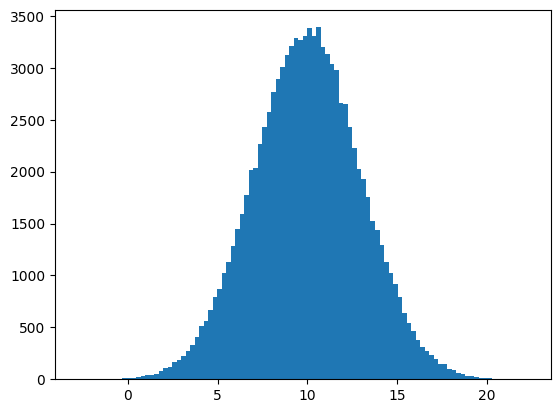

In [11]:
# Visualise data (data = np.random.normal(10.0,3.0,100000)) with a histogram
import matplotlib.pyplot as plt # for visualisation
plt.hist(data, bins=100)
plt.show()

The histogram from our random sample shows a bell shape that indicates that the data is in a normal distribution.
<br> We can further demonstrate this by drawing a normal distribution curve overlaying the histogram [1]

###### ref: [1] GeeksforGeeks. (2024, August 5). How to Plot Normal Distribution over Histogram in Python? GeeksforGeeks. https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/

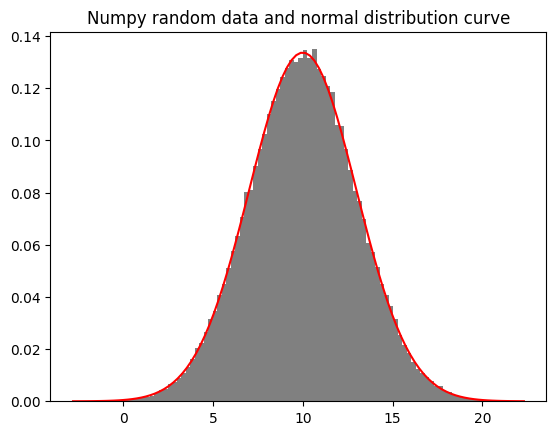

In [12]:
# adapted from lecture notes and geeksforgeeks.org (ref:https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/)
import scipy.stats as stats #for Probability Density Function (PDF)
# Fit a normal distribution to the random data ((data = np.random.normal(10.0,3.0,100000)):

# Plot the histogram of the data with 100 bins, normalize the data (density=True) so it aligns with the curve
plt.hist(data, bins=100, density=True,color='grey')

# Generate values for the x axis, start from minimum to maximum values of the data
x = np.linspace(data.min(), data.max(), 100)
# Calculate the PDF of a normal distribution with the mean and standard deviation of the data
p = stats.norm.pdf(x, data.mean(), data.std())

plt.plot(x, p,"r") # plot the PDF curve
title = "Numpy random data and normal distribution curve"
plt.title(title)
plt.show()

#### Q-Q Plot

Another possible visual test of normality is the QQ Plot. A QQ plot visually assesses if data follows a normal distribution by comparing quantiles of the data against a theoretical normal distribution. If the points forming a line that's roughly straight, it means both sets of quantiles came from the same distribution indicating that the data is likely normal. [1]

###### [1]: Ford, C. (2015). Understanding QQ Plots | UVA Library. [online] library.virginia.edu. Available at: https://library.virginia.edu/data/articles/understanding-q-q-plots.<br> [2]: docs.scipy.org. (n.d.). scipy.stats.probplot — SciPy v1.6.3 Reference Guide. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html.

‌

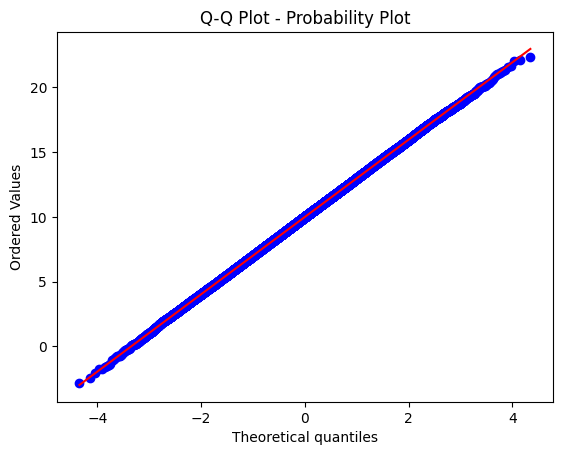

In [13]:
# QQ Plot
import scipy.stats as stats # import module for QQ plot

stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot - Probability Plot")
plt.show()

Both the histogram and the Q-Q plot indicated that data generated with numpy (data = np.random.normal(10.0,3.0,100000)) follows a normal distribution.

# Task 3: t-Test Calculation

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

Patient ID	0	1	2	3	4	5	6	7	8	9 <br>
Before	63	68	70	64	74	67	70	57	66	65<br>
After	64	64	68	64	73	70	72	54	61	63<br>
Calculate the t-statistic based on this data set, using Python. Compare it to the value given by scipy.stats. Explain your work and list any sources used.

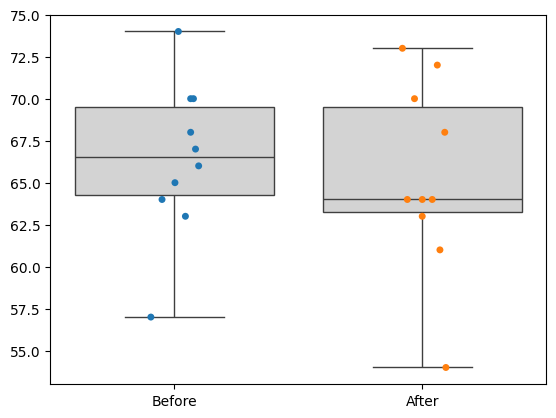

In [21]:
# Record data from task brief
import numpy as np # numpy for array operations
import seaborn as sns # seaborn for visualisation 
# storing data from task brief into arrays
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])
# visualise data
sns.stripplot(data=[before,after])
sns.boxplot(data=[before,after], boxprops={"facecolor": 'lightgrey'})
plt.xticks(ticks=[0, 1], labels=["Before", "After"])
plt.show()

Data is recorded in two arrays; "before" and "after". Visualisation indicates that there is some marginal difference between the two samples (median and min/max slightly different) although the bulk of the data between the 25tha nd 75th quantile mostly overlap.
A statistical test such as a t-test could confirm if the differences are significant.

In [15]:
# Confirm data is normally distributed with Shapiro-Wilk test
print("Shapiro-Wilk test of normal distreibution:\nBefore:",stats.shapiro(before))
print("After:",stats.shapiro(after))

Shapiro-Wilk test of normal distreibution:
Before: ShapiroResult(statistic=0.9726138710975647, pvalue=0.9139653444290161)
After: ShapiroResult(statistic=0.9397047758102417, pvalue=0.5497328639030457)


The purpose of the t-test is to compare certain characteristics representing groups, and the mean values become representative when the population has a normal distribution. This is why normally distributed data is more suitable in t-test especially with small samples.[1] The Shapiro-Wilk Test is a statistical test used to determine if a dataset is normally distributed. [2]<br>
The null hypothesis for this test is that the data follows a normal distribution. Therefore, if the p-value is less than the chosen significance level (typically < 0.05), the null hypothesis is rejected, indicating that the tested data are not normally distributed.
<br>Shapiro-Wilk test returned with lower than 0.05 results for both samples. The data is likely normally distributed and more suitable for t-test

###### [1]: Kim, T.K. and Park, J.H. (2019). More about the basic assumptions of t-test: normality and sample size. Korean Journal of Anesthesiology, [online] 72(4), pp.331–335. doi:https://doi.org/10.4097/kja.d.18.00292.<br>[2]: Shapiro–Wilk test, Wikipedia, ref: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

# t-Test

A t-Test (or Student's t-test) is a statistical test used to determine whether the difference between two samples is significant or not by testing (in it's most common application) whether the means of the two samples are significantly different. T-Test is usually applied when the sample data would follow a normal distribution. [1]<br>
The t-Test utilised in this case is a dependent t-test because the "Before" and "After" measurements come from the same patients. The "Before" data of patient A is paired with the "After" data of the same patient. The Null hypothesis in t-tests for paired samples is that the mean of the differences between the pairs is zero. [2]

###### [1]: Wikipedia Contributors (2019). Student’s t-test. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Student%27s_t-test.<br> [2]: DATAtab Team (2024). t-Test, Chi-Square, ANOVA, Regression, Correlation... [online] datatab.net. Available at: https://datatab.net/tutorial/t-test.

#### Paired t-Test calculation[1]

In order to carry out t-test, first the Test Statitstic is calculated:

$ t = \frac{\bar{x}_{\text{diff}}}{s_{\text{diff}} / \sqrt{n}} $

Where:
- $\bar{x}_{\text{diff}}$: sample mean of the differences
- $s_{\text{diff}}$: sample standard deviation of the differences
- $n$: Number of paired samples.

The next step is to find the Critical t-value using a two-tailed test [2].<br>
With the critical value we can reject or fail to reject the null hypothesis by checking if the difference in the two population means are equal ($ H_{0}$) or not equal ($ H_{A}$)

###### [1]: Zach (2021). How to Perform a Paired t-Test by Hand. [online] Statology. Available at: https://www.statology.org/paired-t-test-by-hand/.<br>[2]: Bobbitt, Z. (2020). How to Find the T Critical Value in Python. [online] Statology. Available at: https://www.statology.org/how-to-find-the-t-critical-value-in-python/ [Accessed 22 Nov. 2024].


In [16]:
# Calculating Test Statistic.

#Calculate x_diff
x_diff = before-after
# find mean and standard deviation of x_diff
mean_diff = np.mean(x_diff) # mean of x_diff
s_diff = np.std(x_diff, ddof=1)  #standard deviation (ddof=1 for sample)
#number of pairs
n = len(x_diff)

#Calculate t-statistic (t = xdiff / (sdiff/√n))
t_stat_manual = mean_diff / (s_diff / np.sqrt(n))

print("Test statistic:", t_stat_manual)


Test statistic: 1.3372274824806283


In [17]:
# Find Critical t-value using python

#getting t-Distribution table from python 
# ref: https://stackoverflow.com/questions/19339305/python-function-to-get-the-t-statistic
# ref: https://www.geeksforgeeks.org/how-to-find-the-t-critical-value-in-python/
from scipy import stats

alpha = 0.05 # standard prbability threshold
df = len(before)-1 #(df=n-1)
critical_t = stats.t.ppf(1 - alpha / 2, df)
print("Critical t-value:", critical_t)

Critical t-value: 2.2621571627409915


#### Results:
The test statistic (1.337) does not exceed the critical t-value (2.262). Therefore, we fail to reject the null hypothesis, which states that the mean difference between the paired samples is zero. We cannot claim that there is a statistically significant difference between the means of the two samples.

### T-Test with scipy.stats

Scipy's `scipy.stats.ttest_rel()` function calculates the t-test on two related samples of scores, a and b.
This is a test for the null hypothesis that two related or repeated samples have identical average (expected) values.[1]<br>
The default assumption of a t-test is that there is no relationship between the samples. Therefore, for measurements from the same individuals, a paired t-test (`ttest_rel`() in SciPy) is used. For independent groups, `ttest_ind()` would be used instead.[2]

###### [1]: docs.scipy.org. (n.d.). scipy.stats.ttest_rel — SciPy v1.10.0 Manual. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html.<br>[2]: Neuraldatascience.io. (2020). Basic Statistics in Python: t tests with SciPy — Neural Data Science in Python. [online] Available at: https://neuraldatascience.io/5-eda/ttests.html [Accessed 22 Nov. 2024].

In [18]:
# Paired t-test on patient data using scipy.stats
from scipy.stats import ttest_rel # scipy for t-test

# Perform paired t-test using scipy t-test
result = ttest_rel(before, after) #ttest_rel is used for paired or dependent t-test, for independent t-test scipy uses ttest_ind()

print("t-statistic:", result[0],"\np-value:", result[1],"\ndegree of freedom:", result.df)

#ttest_rel ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

t-statistic: 1.337227482480628 
p-value: 0.21396011317404623 
degree of freedom: 9


#### Output analysis:

In a paired t-test, the hypotheses are:
- Null hypothesis: The mean of the differences between the pairs is zero.
- Alternative hypothesis: The mean of the differences between the pairs is non-zero.

With a p-Value of 0.214 (𝑝>0.05) we can't reject the null hypothesis therefore there is no strong evidence of the difference being non random, hence the effects of the exercise are not statistically significant.


#### The results from the manual t-test and scipy.stats t-test are identical; we failed to reject the null hypothesis, indicating that there is no strong evidence that the mean of the differences between the paired samples is non-zero. This suggests in practical terms that the differences in a patient’s heart rate before and after the two-week exercise program are not statistically significant. 
They might have just stayed home and watched TV.

# Task 4: ANOVA

###### In this test we will estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called no_type_ii and set it to 0.<br>Now use a loop to perform the following test 10,000 times.<br>Use numpy.random.normal to generate three samples with 100 values each. Give each a standard deviation of 0.1. Give the first sample a mean of 4.9, the second a mean of 5.0, and the third a mean of 5.1.<br>Perform one-way anova on the three samples and add 1 to no_type_ii whenever a type II error occurs.<br>Summarize and explain your results.

ANOVA (Analysis of Variance developed by Ronald Fisher) is a statistical method used to analyze differences among group means in a sample. It is particularly useful when comparing multiple groups simultaneously, which is a limitation of other tests like t-tests.<br>

There are different types of ANOVA:
+ One-way ANOVA: Uses one independent variable
+ Two-way ANOVA: Uses two independent variables
+ N-way ANOVA: Analyzes multiple factors and their interactions <br>

ANOVA works by comparing the variance within groups to the variance between groups. The result is expressed as an F-statistic, p value and degree of freedom. <br> 
$$[F = \frac{\text{between-group variability}}{\text{within-group variability}}]$$
F-statistic measures the variability between group means compared with the variability within groups. This is result of the F-test which - in the context of the one-way ANOVA - compares the means of three or more independent groups by evaluating the ratio of variances, derived from squared sums of deviations, that reflect the differences between group means. A higher F-value indicates greater differences among group means, which may lead to rejecting the null hypothesis of equal means if it exceeds a critical threshold. The p-value indicates whether the observed F-statistic is statistically significant or likely due to random chance.[1]
<br>The result of the F-test can be determined by using an F Table, comparing calculated F value and critical F value under a specific significance level (e.g.: p>0.05) and degree of freedom which indicated sample size and number of groups compared [2]<br>
In python one of the most popular functions to perform a one-way ANOVA is SciPy's `f_oneway()` function which returns `statistic` for F value and `pvalue` for the associated significance level.[3]


###### [1]Wikipedia Contributors (2019). Analysis of variance. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Analysis_of_variance.<br>[2]: Wikipedia Contributors (2019). F-test. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/F-test.[3]: Scipy.org. (2014). scipy.stats.f_oneway — SciPy v1.3.1 Reference Guide. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html.

### Type I and Type II errors
In statistical hypothesis testing, a Type I error (false positive) occurs when the null hypothesis is rejected despite being true, while a Type II error (false negative) happens when the null hypothesis is not rejected even though it is actually false.[1]<br>

### Detecting Type II errors
The rate of the type II error is denoted by the Greek letter β (beta) and related to the power of a test, which equals 1−β.[1]
###### ![Hypothesis Testing Curves](https://images.squarespace-cdn.com/content/v1/5acbdd3a25bf024c12f4c8b4/1610052918387-PX5P6TN8MDFZA3YKHFFO/H0+and+H1+Curves.png?format=1500w)<br>*Probability of experimental observation at a given level [2]*

Statistical power is a critical concept in hypothesis testing that measures the ability of a test to detect a true effect when one exists. It is defined as the probability of correctly rejecting a false null hypothesis, in other words, the likelihood of avoiding a Type II (false negative) error. [2]
The power of a test is influenced by several factors, including:
+ **sample size:** number of observations
+ **effect size ($d$):** quantitative measure of the magnitude or strength of the relationship between two variables which basically tells how meaningful the relationship between variables or the difference between groups is. It is calculated with Cohen's formula that takes the difference between means and the standard deviation. [3]
$$ d = \frac{\bar{x}_1 - \bar{x}_2}{s_{\text{}}}$$
+ chosen **significance level** (α): the probability of the test rejecting the null hypothesis (Type I error rate)
  
A test with high statistical power has a greater chance of identifying genuine effects in the population, while a low-powered test may fail to detect important differences or relationships.[2]

###### [1]:Wikipedia (2021). Type I and type II errors. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Type_I_and_type_II_errors.<br>[2]: AI (2014). The Science of Machine Learning & AI. [online] The Science of Machine Learning & AI. Available at: https://www.ml-science.com/statistical-power-of-a-test<br>[3]: Bhandari, P. (2020). What is Effect Size and Why Does It Matter? [online] Scribbr. Available at: https://www.scribbr.com/statistics/effect-size/.‌

### Estimate the probability of committing a type II error in specific circumstances

In [19]:
# estimate the probability of committing a type II error in specific circumstances

import numpy as np
from scipy.stats import f_oneway

# create a variable called no_type_ii and set it to 0.
no_type_ii = 0

# loop 10,000 times
for _ in range(10000):
    # Use numpy.random.normal to generate three samples with 100 values each. 
    # Give each a standard deviation of 0.1.
    sample1 = np.random.normal(4.9, 0.1, 100) # Give the first sample a mean of 4.9,
    sample2 = np.random.normal(5.0, 0.1, 100) # the second a mean of 5.0, 
    sample3 = np.random.normal(5.1, 0.1, 100) # and the third a mean of 5.1.
    
    # Perform ANOVA
    f_stat, p_value = f_oneway(sample1, sample2, sample3)
    
    # Check for Type II error (fail to reject null hypothesis)
    if p_value > 0.05: # 0.05commonly used significance threshold
        no_type_ii += 1

print(f"Probability of Type II error: {no_type_ii}\n\nOne Way ANOVA results:\n f_stat: {round(f_stat,4)}\n p_value: {p_value}")

Probability of Type II error: 0

One Way ANOVA results:
 f_stat: 87.6898
 p_value: 1.1805803667156467e-30


### Output analysis

*Probability of Type II error: 0*

As ANOVA compares between-group variability to within-group variability (variance within groups to the variance between groups), it will most confidently reject the null hypothesis (*there is no difference among group means*) with  a combination of large sample sizes, distinct group means, and low within-group variability (small standard deviations) or in other words in samples with high statistical power.
The result of 0 Type II errors indicates that the test has a high statistical power. This is due to the following factors:
+ Relatively large sample size (100 observations per group), which reduces variability and increases the accuracy of detecting differences.
+ Low magnitude standard deviation (0.1) across the samples, reduces within-group variability.
+ Relatively distinct means (4.9, 5.0, 5.1), making it easier for the test to detect differences.


*ANOVA result*
###### For output:<br> f_stat: 91.8155<br> p_value: 9.021368293108903e-32

The F-statistic, which compares between-group variability to within-group variability, was large enough to produce a p-value below the set significance level (0.05). This suggests that the differences between groups are unlikely to show by chance. The differences between the group means are statistically significant.

#### Experimenting with the test to force Type II error
With some trial and error I was able to force the occurrence of Type II errors by reducing the power of the test with the following interactions;
+ By significantly reducing the sample size
+ Increased at least one of the means to a minimum of 0.7
+ Changing the means to a much closer 4.99, 5.0, 5.01 values also resulted in Type II errors.
+ Changing the p_value in combination with above